In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset

$$y = 6x^3 - 5x^2 + 9$$

(1000,) (1000,)


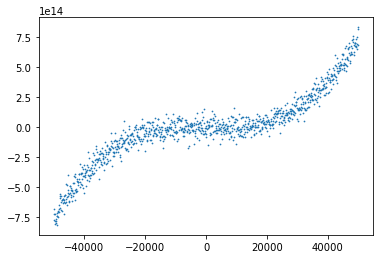

In [2]:
N = 100000
x_train = np.arange(-N//2, N//2, 100)
y_train = 6*x_train**3 - 5*x_train**2 + 9 + np.random.normal(0, N**2.75, size=x_train.shape[0])

print(x_train.shape, y_train.shape)
plt.scatter(x_train, y_train, s=0.5)
plt.show()

# 2. Feat Engineering
- We can solve polynomial Regression by **Multi-var Linear Regression**
- From x add more feature `[x**4, x**3, x**2, x]`

#### Method 1: Manual

In [3]:
from sklearn.preprocessing import StandardScaler

def feature_engineer(x):
    # Create polynomial feats
    X = np.c_[x, x**2, x**3, x**4]
    
    # Z-norm
    z_norm_scaler = StandardScaler()
    X = z_norm_scaler.fit_transform(X)
    
    return X, z_norm_scaler

In [4]:
X_train_poly, _ = feature_engineer(x_train)
X_train_poly.shape

(1000, 4)

#### Method 2: Sklearn poly

In [5]:
from sklearn.preprocessing import StandardScaler

def feature_engineer_sklearn(x):
    # Create polynomial feats
    from sklearn.preprocessing import PolynomialFeatures

    poly = PolynomialFeatures(degree=4, include_bias=False)
    X = poly.fit_transform(x.reshape(-1, 1))
    
    # Z-norm
    z_norm_scaler = StandardScaler()
    X = z_norm_scaler.fit_transform(X)
    
    return X, z_norm_scaler

In [6]:
X_train_poly, _ = feature_engineer_sklearn(x_train)
X_train_poly.shape

(1000, 4)

# 3. Fit
$$\hat{y} = w_4x^4 + w_3x^3 + w_2x^2 + w_1x + b$$

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(
    X=X_train_poly,
    y=y_train)


print('[w1, w2, w3, w4] =', lr.coef_)
print('b =', lr.intercept_)

[w1, w2, w3, w4] = [-3.70864336e+11  9.32586812e+11  2.85897538e+14 -2.03205716e+12]
b = -2881956848131.5776


# 4. Inference

In [8]:
y_hat = lr.predict(X_train_poly)

In [9]:
for x in range(3):
    i = np.random.randint(0, x_train.shape[0])
    print(f'y[{i}] = {y_train[i]}, y_hat[{i}] = {y_hat[i]}')

y[285] = -95955413210634.48, y_hat[285] = -61190739013743.34
y[154] = -287450803118143.7, y_hat[154] = -252104703307995.44
y[570] = -7176716974993.998, y_hat[570] = 399224755436.3491


#### Plot polyline

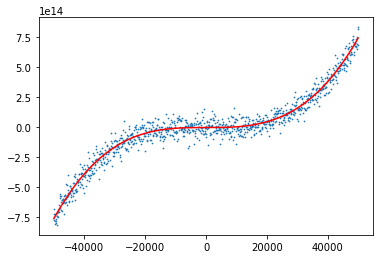

In [10]:
plt.scatter(x_train, y_train, s=0.5)
plt.plot(x_train, y_hat, 'r-')
plt.show()

#### R2 score

In [11]:
from sklearn.metrics import r2_score


r2 = r2_score(
    y_true=y_train,
    y_pred=y_hat)
print(f'R2 = {r2:.3f}')

R2 = 0.964
